当前运行到第 0
当前运行到第 1
当前运行到第 2
当前运行到第 3
当前运行到第 4
当前运行到第 5
当前运行到第 6
当前运行到第 7
当前运行到第 8
当前运行到第 9
当前运行到第 10
当前运行到第 11
当前运行到第 12
当前运行到第 13
当前运行到第 14
当前运行到第 15
当前运行到第 16
当前运行到第 17
当前运行到第 18
当前运行到第 19
当前运行到第 20
当前运行到第 21
当前运行到第 22
当前运行到第 23
当前运行到第 24
当前运行到第 25
当前运行到第 26
当前运行到第 27
当前运行到第 28
当前运行到第 29
当前运行到第 30
当前运行到第 31
当前运行到第 32
当前运行到第 33
当前运行到第 34
当前运行到第 35
当前运行到第 36
当前运行到第 37
当前运行到第 38
当前运行到第 39
当前运行到第 40
当前运行到第 41
当前运行到第 42
当前运行到第 43
当前运行到第 44
当前运行到第 45
当前运行到第 46
当前运行到第 47
当前运行到第 48
当前运行到第 49
当前运行到第 50
当前运行到第 51
当前运行到第 52
当前运行到第 53
当前运行到第 54
当前运行到第 55
当前运行到第 56
当前运行到第 57
当前运行到第 58
当前运行到第 59
当前运行到第 60
当前运行到第 61
当前运行到第 62
当前运行到第 63
当前运行到第 64
当前运行到第 65
当前运行到第 66
当前运行到第 67
当前运行到第 68
当前运行到第 69
当前运行到第 70
当前运行到第 71
当前运行到第 72
当前运行到第 73
当前运行到第 74
当前运行到第 75
当前运行到第 76
当前运行到第 77
当前运行到第 78
当前运行到第 79
当前运行到第 80
当前运行到第 81
当前运行到第 82
当前运行到第 83
当前运行到第 84
当前运行到第 85
当前运行到第 86
当前运行到第 87
当前运行到第 88
当前运行到第 89
当前运行到第 90
当前运行到第 91
当前运行到第 92
当前运行到第 93
当前运行到第 94
当前运行到第 95
当前运行到第 96
当前运行到第 97
当前运行到第 98
当前运行到第 99


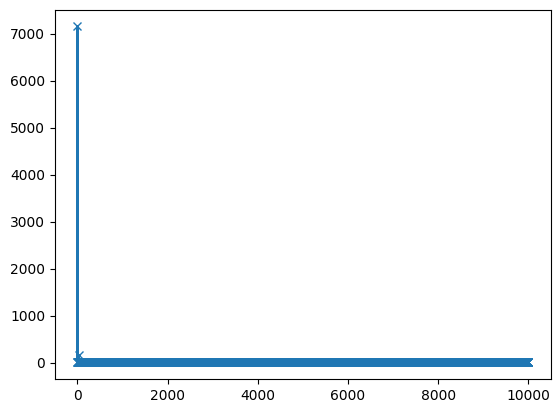

In [55]:
#该代码求解min y=1.10471*x1^2*x2+0.04811*x3*x4*(14+x2);
import torch
import torch.nn as nn
from torchsummary import summary
import pdb
import math
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from tensorboardX import SummaryWriter
from torch.utils.tensorboard import SummaryWriter
import torch.nn.init as init
# def fanfunc(x):
#     k=100#y属于(0,k)
#     result = torch.log((x /(k-x))) / 2
#     return result #这里加了绝对值防止对数取负数报错
def fanfunc1(x):
    a=0.1
    b=0.3#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc2(x):
    a=3.45
    b=3.5#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc3(x):
    a=9.0
    b=9.05#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc4(x):
    a=0.1
    b=0.3#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错


class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):
        k=10000
        x1,x2,x3,x4 = x[:, 0], x[:, 1], x[:, 2], x[:, 3]
        x1 = fanfunc1(x1)
        x2 = fanfunc2(x2)
        x3 = fanfunc3(x3)
        x4 = fanfunc4(x4)
        M = 6000*(14+x2/2)
        R = pow(pow(x2,2)/4+pow((x1+x3)/2,2),0.5)
        J = 2*(x1*x2*pow(2,0.5)*(pow(x2,2)/12+pow((x1+x3)/2,2)))
        tao2 = M*R/J
        tao1 = 6000/(x1*x2*pow(2,0.5))
        tao = pow(pow(tao1,2)+2*tao1*tao2*x2/(2*R)+pow(tao2,2),0.5)#这是正确的限制条件
        #tao = pow(tao1+2*tao1*tao2*x2/(2*R)+pow(tao2,2),0.5)#这是论文中错误的限制条件
        sigma = 504000/(x4*pow(x3,2))
        delta = 65856000/(x4*pow(x3,3)*30e6)
        px = 4.013*(30e6)*pow(pow(x3,2)*pow(x4,6)/36,0.5)*(1-x3*pow(30e6/(48e6),0.5)/28)/196
        
        y1 = tao-13600
        y2 = sigma-30000
        y3 = x1-x4
        y4 = 0.10471*pow(x1,2)+0.04811*x3*x4*(14+x2)-5
        y5 = 0.125-x1
        y6 = delta-0.25
        y7 = 6000-px
        y8 = 1.10471*pow(x1,2)*x2+0.04811*x3*x4*(14+x2)
     
        y1 = F.relu(y1)
        y2 = F.relu(y2)
        y3 = F.relu(y3)
        y4 = F.relu(y4)
        y5 = F.relu(y5)
        y6 = F.relu(y6)
        y7 = F.relu(y7)

        y1 = k*y1
        y2 = k*y2
        y3 = k*y3
        y4 = k*y4
        y5 = k*y5
        y6 = k*y6
        y7 = k*y7


        return torch.stack([y1, y2, y3, y4, y5, y6, y7, y8], dim=1)

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1, 4)
        self.fc2 = CustomLayer()
        self.fc3 = nn.Linear(8, 1)

        self.fc1.weight.requires_grad = True
        self.fc1.bias.requires_grad = False
        #self.fc2.weight.requires_grad = False
        #self.fc2.bias.requires_grad = False
        self.fc3.weight.requires_grad = False
        self.fc3.bias.requires_grad = False

        init.uniform_(self.fc1.weight, 0,1)

#         A=0.5
#         B=28
#         init.uniform_(self.fc1.weight.data[0][0], (2.6-A)/(B-A), (3.6-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[1][0], (0.7-A)/(B-A), (0.8-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[2][0], (17-A)/(B-A), (28-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[3][0], (7.3-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[4][0], (7.8-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[5][0], (2.9-A)/(B-A), (3.9-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[6][0], (5-A)/(B-A), (5.5-A)/(B-A))
        #init.normal_(self.fc1.weight, mean=0, std=0.01)
        #init.xavier_normal_(self.fc1.weight)

        #self.fc1.weight.data.fill_(0.99) #初始化权重
#         self.fc1.weight.data[0, 0] = 0.7468 # 这是 w1 的初始值
#         self.fc1.weight.data[1, 0] = 0.61 # 这是 w2 的初始值

        self.fc1.bias.data.fill_(0)
        self.fc3.weight.data.fill_(1) #初始化权重
        self.fc3.bias.data.fill_(0)

    def forward(self, x):

        b = self.fc1(x)
        #print(self.fc1.weight) 
        #print('x=',x)
        #print('x_size',x.size())
        #print('b=',b)
        c = self.fc2(b)
        #print('c=',c)
        d = self.fc3(c)
        #print('d=',d)
        #print('w1=',w1)
        #print('w2=',w2)
        return d
NUM=100
RESULT_MIN=np.zeros(NUM)
RESULT_W1=np.zeros(NUM)
RESULT_W2=np.zeros(NUM)
RESULT_W3=np.zeros(NUM)
RESULT_W4=np.zeros(NUM)    
for i in range(NUM):
    print('当前运行到第',i)
    net = MyNet()
    MAX = 10000
    def train(model):
        model.train()
        optimizer = optim.Adam(model.parameters(), lr=0.0001)
        train_loss = 0
        x = torch.tensor([[1.0]],requires_grad=True)
        n=1
        R_w1=[]
        R_w2=[]
        R_w3=[]
        R_w4=[]
        R=[]
        prev_grad_norm = float('inf') 
        prev_loss = float('inf') 
        while True:
            optimizer.zero_grad()
            loss = model(x)
            loss.requires_grad_(True)
            #print('loss=',loss)
            loss.backward()
            R.append(loss.detach().numpy())
            #print('R=',loss.detach().numpy())
            R_w1.append(model.fc1.weight[0][0].item())
            R_w2.append(model.fc1.weight[1][0].item())
            R_w3.append(model.fc1.weight[2][0].item())
            R_w4.append(model.fc1.weight[3][0].item())
            optimizer.step()
            k=1
            model.fc1.weight.data.clamp_(0, k)
            train_loss += loss.item()
            n = n+1
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            #if abs(prev_grad_norm - grad_norm) < 1e-8:
            if loss.item() > prev_loss and n > 500:
            #if n>MAX:
            #if loss.item() < 1e-6:  # 收敛条件
                break
            prev_loss = loss.item()
            if n>10000:
                break

            prev_grad_norm = grad_norm
        return loss,np.squeeze(R),R_w1,R_w2,R_w3,R_w4
    loss=[]
    R=[]
    R_w1=[]
    R_w2=[]
    R_w3=[]
    R_w4=[]  
    loss,R,R_w1,R_w2,R_w3,R_w4=train(net)
    RESULT_MIN[i]=R[np.argmin(R)]
    RESULT_W1[i]=R_w1[np.argmin(R)]
    RESULT_W2[i]=R_w2[np.argmin(R)]
    RESULT_W3[i]=R_w3[np.argmin(R)]
    RESULT_W4[i]=R_w4[np.argmin(R)]

loss,R,R_w1,R_w2,R_w3,R_w4=train(net)
x=np.arange(len(R))
plt.plot(x,R,marker="x")
plt.show()
writer = SummaryWriter()
writer.add_graph(net, torch.tensor([[1.0]],requires_grad=True))
writer.close()


In [56]:
www=np.argmin(RESULT_MIN)
w1=fanfunc1(RESULT_W1[www])
w2=fanfunc2(RESULT_W2[www])
w3=fanfunc3(RESULT_W3[www])
w4=fanfunc4(RESULT_W4[www])
MIN=min(RESULT_MIN)
print('w1=',w1,'w2=',w2,'w3=',w3,'w4=',w4,'min=',MIN)

w1= 0.20561234951019286 w2= 3.471104520559311 w3= 9.041597485542297 w4= 0.20579657554626463 min= 1.726119875907898


In [36]:
RESULT_MIN

array([1.14796648e+05, 8.75958812e+05, 1.72808921e+00, 2.01091484e+04,
       1.73343253e+00, 6.92302500e+04, 2.18644297e+05, 8.07843562e+05,
       1.73286891e+00, 2.19259547e+05, 1.37882594e+05, 1.91027125e+05,
       5.74919688e+04, 1.73310232e+00, 1.72876990e+00, 1.50001734e+05,
       1.74138248e+00, 1.73745823e+00, 2.74806406e+05, 2.09884547e+05,
       1.72722387e+00, 1.73306572e+00, 1.72758007e+00, 1.94933375e+05,
       2.54816188e+05, 3.58253656e+05, 1.72779977e+00, 2.75314250e+05,
       1.73566389e+00, 1.73203981e+00, 1.73493540e+00, 1.72712111e+00,
       1.72947490e+00, 1.72922969e+00, 2.75304469e+05, 1.63341578e+05,
       1.73937476e+00, 1.72895205e+00, 1.73420656e+00, 1.66310328e+05,
       2.11993922e+05, 2.03634547e+05, 1.74067771e+00, 1.72947896e+00,
       1.06827906e+05, 1.73624837e+00, 5.19548516e+04, 4.48943086e+04,
       1.51954844e+05, 1.20275172e+05, 1.73921156e+00, 1.73209858e+00,
       1.72893357e+00, 1.73617196e+00, 1.73074448e+00, 2.03683359e+05,
      

In [33]:
x1 = w1
x2 = w2
x3 = w3
x4 = w4
M = 6000*(14+x2/2)
R = pow(pow(x2,2)/4+pow((x1+x3)/2,2),0.5)
J = 2*(x1*x2*pow(2,0.5)*(pow(x2,2)/12+pow((x1+x3)/2,2)))
tao2 = M*R/J
tao1 = 6000/(x1*x2*pow(2,0.5))
#tao = pow(pow(tao1,2)+2*tao1*tao2*x2/(2*R)+pow(tao2,2),0.5)#这是正确的限制条件
tao = pow(pow(tao1,2)+2*tao1*tao2*x2/(2*R)+pow(tao2,2),0.5)#这是论文中错误的限制条件
sigma = 504000/(x4*pow(x3,2))
delta = 65856000/(x4*pow(x3,3)*30e6)
px = 4.013*(30e6)*pow(pow(x3,2)*pow(x4,6)/36,0.5)*(1-x3*pow(30e6/(48e6),0.5)/28)/196
y1 = tao-13600
y2 = sigma-30000
y3 = x1-x4
y4 = 0.10471*pow(x1,2)+0.04811*x3*x4*(14+x2)-5
y5 = 0.125-x1
y6 = delta-0.25
y7 = 6000-px
y16 = 1.10471*pow(x1,2)*x2+0.04811*x3*x4*(14+x2)
print('y1-y7:',y1,y2,y3,y4,y5,y6,y7,'F=',y16)

y1-y7: -1.1789026681872201 -0.005860243229108164 -0.00035131692141293636 -3.432256729636558 -0.0803897679924965 -0.23553992461776568 -0.8920731886219073 F= 1.7254220039209651


In [9]:
x1 = 0.205874690137958
x2 = 3.502745754535745
x3 = 8.946074440839230
x4 = 0.209919160046462
M = 6000*(14+x2/2)
R = pow(pow(x2,2)/4+pow((x1+x3)/2,2),0.5)
J = 2*(x1*x2*pow(2,0.5)*(pow(x2,2)/12+pow((x1+x3)/2,2)))
tao2 = M*R/J
tao1 = 6000/(x1*x2*pow(2,0.5))
#tao = pow(pow(tao1,2)+2*tao1*tao2*x2/(2*R)+pow(tao2,2),0.5)#这是正确的限制条件
tao = pow(pow(tao1,2)+2*tao1*tao2*x2/(2*R)+pow(tao2,2),0.5)#这是论文中错误的限制条件
sigma = 504000/(x4*pow(x3,2))
delta = 65856000/(x4*pow(x3,3)*30e6)
px = 4.013*(30e6)*pow(pow(x3,2)*pow(x4,6)/36,0.5)*(1-x3*pow(30e6/(48e6),0.5)/28)/196
y1 = tao-13600
y2 = sigma-30000
y3 = x1-x4
y4 = 0.10471*pow(x1,2)+0.04811*x3*x4*(14+x2)-5
y5 = 0.125-x1
y6 = delta-0.25
y7 = 6000-px
y16 = 1.10471*pow(x1,2)*x2+0.04811*x3*x4*(14+x2)
print('y1-y7:',y1,y2,y3,y4,y5,y6,y7,'F=',y16)

y1-y7: -0.25198073165665846 -0.5397331749518344 -0.004044469908503989 -3.4142187549042764 -0.080874690137958 -0.23539422886619973 -331.86006162808553 F= 1.745350339387175


In [7]:
J

42.093924827309344